In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns
sns.set_style('white')


# Formating for the entire excercise
pd.options.display.float_format = "{:,.2f}".format

In [2]:
# Read the CSV with the full data from Diabetes dataset (https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html)

diabetes_csv = "Data/National_Data.csv"
diabetes_df = pd.read_csv(diabetes_csv)
diabetes_df

,yearid,fipscode,raceid,ageid,genderid,educationid,indicatorid,miscid,datasourceid,estimateid,SuppressID,datasetid,GeoLevel,Estimate,SeEstimate,LowerLimit,UpperLimit
0,1980,-1,0,5,0,0,1,0,30,61,0,40,National,1.00,0.1,0.9,1.2
1,1980,-1,0,5,0,0,1,0,30,101,0,40,National,915.00,76,764,1065
2,1980,-1,0,6,0,0,1,0,3,61,0,3,National,5.40,0.3,4.8,6
3,1980,-1,0,6,0,0,1,0,3,101,0,3,National,"2,337.00",143,2054,2621
4,1980,-1,0,6,0,0,1,0,30,61,0,40,National,5.40,0.3,4.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29097,2017,-1,1,100,0,0,2,0,3,72,0,31,National,6.10,0.5,5.2,7.1
29098,2017,-1,2,99,0,0,2,0,3,72,0,31,National,8.70,1.2,6.6,11.5
29099,2017,-1,2,100,0,0,2,0,3,72,0,31,National,9.20,1.3,7,12.1
29100,2017,-1,7,99,0,0,2,0,3,72,0,31,National,9.70,1.6,7,13.4


In [3]:
# Get a list of all of our columns for easy reference.

diabetes_df.columns

Index(['yearid', 'fipscode', 'raceid', 'ageid', 'genderid', 'educationid',
       'indicatorid', 'miscid', 'datasourceid', 'estimateid', 'SuppressID',
       'datasetid', 'GeoLevel', 'Estimate', 'SeEstimate', 'LowerLimit',
       'UpperLimit'],
      dtype='object')

In [4]:
# Reduce DF to allocate just the columns needed (indicatorid / ageid / estimateid / datasetid / raceid / yearid)

diabetes_race_df = diabetes_df.loc[:, ["indicatorid", "ageid", "estimateid", "datasetid", "raceid", "yearid","Estimate"]]
diabetes_race_df


,indicatorid,ageid,estimateid,datasetid,raceid,yearid,Estimate
0,1,5,61,40,0,1980,1.00
1,1,5,101,40,0,1980,915.00
2,1,6,61,3,0,1980,5.40
3,1,6,101,3,0,1980,"2,337.00"
4,1,6,61,40,0,1980,5.40
...,...,...,...,...,...,...,...
29097,2,100,72,31,1,2017,6.10
29098,2,99,72,31,2,2017,8.70
29099,2,100,72,31,2,2017,9.20
29100,2,99,72,31,7,2017,9.70


In [5]:
# Race DF. Rename the raceid indicator using cut/bins.

# Create bins in which to place values based on races.
bins = [0,1,2,3,7]

# Create labels for these bins
labels = ["White", "Black", "Asian", "Hispanic"]

# Slice the data and place it into bins
diabetes_race_df["Race"] = pd.cut(diabetes_df["raceid"], bins, labels=labels)
diabetes_race_df


,indicatorid,ageid,estimateid,datasetid,raceid,yearid,Estimate,Race
0,1,5,61,40,0,1980,1.00,NaN
1,1,5,101,40,0,1980,915.00,NaN
2,1,6,61,3,0,1980,5.40,NaN
3,1,6,101,3,0,1980,"2,337.00",NaN
4,1,6,61,40,0,1980,5.40,NaN
...,...,...,...,...,...,...,...,...
29097,2,100,72,31,1,2017,6.10,White
29098,2,99,72,31,2,2017,8.70,Black
29099,2,100,72,31,2,2017,9.20,Black
29100,2,99,72,31,7,2017,9.70,Hispanic


In [6]:
# Create a new df with the parameters by each variable / 1,000s (estimateid = 101)

race_analysis_pop = diabetes_race_df.loc[(diabetes_race_df["indicatorid"] == 1) & (diabetes_race_df["ageid"]== 99) & \
                  (diabetes_race_df["estimateid"] == 101) & (diabetes_race_df["datasetid"] == 3) & \
                  (diabetes_race_df["yearid"] >= 2000)].dropna()

race_analysis_pop = race_analysis_pop.reset_index(drop = True)

race_analysis_pop

,indicatorid,ageid,estimateid,datasetid,raceid,yearid,Estimate,Race
0,1,99,101,3,1,2000,"9,169.00",White
1,1,99,101,3,2,2000,"2,003.00",Black
2,1,99,101,3,3,2000,258.00,Asian
3,1,99,101,3,7,2000,"1,345.00",Hispanic
4,1,99,101,3,1,2001,"10,025.00",White
...,...,...,...,...,...,...,...,...
67,1,99,101,3,7,2016,"3,740.00",Hispanic
68,1,99,101,3,1,2017,"17,560.00",White
69,1,99,101,3,2,2017,"3,345.00",Black
70,1,99,101,3,3,2017,"1,354.00",Asian


In [7]:
# Check what type are each variable.

race_analysis_pop.dtypes

indicatorid       int64
ageid             int64
estimateid        int64
datasetid         int64
raceid            int64
yearid            int64
Estimate        float64
Race           category
dtype: object

In [8]:
# Use pd to convert a float the "Estimate" column.
race_analysis_pop['Estimate'] = pd.to_numeric(race_analysis_pop['Estimate'])
race_analysis_pop.dtypes

# race_analysis_pop["yearid"] = race_analysis_pop["yearid"].astype(str)

indicatorid       int64
ageid             int64
estimateid        int64
datasetid         int64
raceid            int64
yearid            int64
Estimate        float64
Race           category
dtype: object

In [9]:
# Using .pivot_table create the dataframe (https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

race_table_pop = race_analysis_pop.pivot_table(values=["Estimate"], index=["yearid"], columns=["Race"],aggfunc=np.sum)
race_table_pop

Estimate                           
Race       White    Black    Asian Hispanic
yearid                                     
2000    9,169.00 2,003.00   258.00 1,345.00
2001   10,025.00 2,068.00   267.00 1,506.00
2002   10,430.00 2,094.00   363.00 1,561.00
2003   11,281.00 2,125.00   355.00 1,574.00
2004   11,884.00 2,426.00   519.00 1,884.00
2005   13,009.00 2,522.00   437.00 1,922.00
2006   13,252.00 2,888.00   696.00 2,182.00
2007   12,999.00 2,905.00   825.00 2,346.00
2008   14,680.00 2,766.00   741.00 2,548.00
2009   15,998.00 3,339.00   779.00 2,883.00
2010   16,286.00 3,287.00   897.00 3,208.00
2011   15,920.00 3,264.00   916.00 3,048.00
2012   16,328.00 3,469.00 1,005.00 3,208.00
2013   17,228.00 3,334.00   987.00 3,423.00
2014   16,621.00 3,663.00   987.00 3,473.00
2015   17,501.00 3,743.00 1,194.00 3,633.00
2016   17,582.00 3,774.00 1,079.00 3,740.00
2017   17,560.00 3,345.00 1,354.00 4,118.00

In [10]:
# Create a new df with the parameters by each variable / Percentage (estimateid = 61)

race_analysis_per = diabetes_race_df.loc[(diabetes_race_df["indicatorid"] == 1) & (diabetes_race_df["ageid"]== 99) & \
                  (diabetes_race_df["estimateid"] == 61) & (diabetes_race_df["datasetid"] == 3) & \
                  (diabetes_race_df["yearid"] >= 2000)].dropna()

race_analysis_per = race_analysis_per.reset_index(drop = True)

race_analysis_per

,indicatorid,ageid,estimateid,datasetid,raceid,yearid,Estimate,Race
0,1,99,61,3,1,2000,4.20,White
1,1,99,61,3,2,2000,6.00,Black
2,1,99,61,3,3,2000,2.90,Asian
3,1,99,61,3,7,2000,4.10,Hispanic
4,1,99,61,3,1,2001,4.60,White
...,...,...,...,...,...,...,...,...
67,1,99,61,3,7,2016,6.60,Hispanic
68,1,99,61,3,1,2017,7.20,White
69,1,99,61,3,2,2017,8.10,Black
70,1,99,61,3,3,2017,6.80,Asian


In [11]:
# Using .pivot_table create the dataframe (https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

race_table_per = race_analysis_per.pivot_table(values=["Estimate"], index=["yearid"], columns=["Race"],aggfunc=np.sum)
race_table_per

Estimate                     
Race      White Black Asian Hispanic
yearid                              
2000       4.20  6.00  2.90     4.10
2001       4.60  6.10  2.90     4.40
2002       4.70  6.20  3.70     4.40
2003       4.80  6.00  3.70     4.00
2004       5.10  6.80  4.90     4.60
2005       5.50  7.00  4.10     4.60
2006       5.60  7.70  5.40     5.00
2007       5.50  7.70  6.20     5.20
2008       6.20  7.30  5.50     5.50
2009       6.70  8.60  5.70     6.00
2010       6.70  8.50  6.20     6.50
2011       6.60  8.40  6.10     6.10
2012       6.70  9.00  6.30     6.10
2013       7.10  8.50  5.90     6.40
2014       6.80  9.10  5.60     6.40
2015       7.10  9.20  6.50     6.50
2016       7.10  9.30  5.70     6.60
2017       7.20  8.10  6.80     7.10

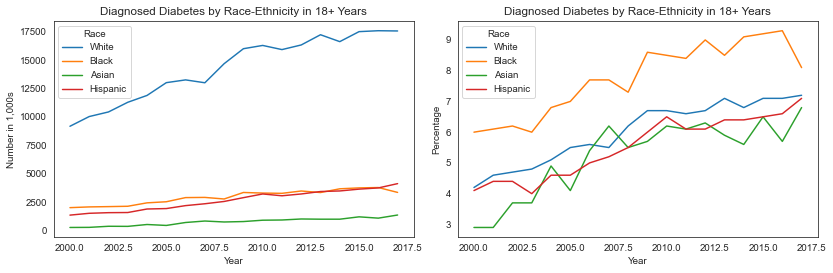

In [12]:
# Create a plot - for the dataset (https://seaborn.pydata.org/generated/seaborn.lineplot.html)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=70,figsize = (12,4))

plot00= sns.lineplot(data=race_analysis_pop, x="yearid", y="Estimate", hue="Race", ax=axes[0])
axes[0].set_title("Diagnosed Diabetes by Race-Ethnicity in 18+ Years")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Number in 1,000s")
# plt.xticks(rotation="vertical")
plt.tight_layout()


plot01= sns.lineplot(data=race_analysis_per, x="yearid", y="Estimate", hue="Race",ax=axes[1])
axes[1].set_title("Diagnosed Diabetes by Race-Ethnicity in 18+ Years")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Percentage")
# plt.xticks(rotation="vertical")
plt.tight_layout()

plt.show()

In [13]:
# Correlation Analysis - Race vs Education.

In [14]:
# Reduce DF to allocate just the columns needed (indicatorid / ageid / estimateid / datasetid / raceid / yearid)

edu_race_df = diabetes_df.loc[:, ["indicatorid", "ageid", "estimateid", "datasetid", "educationid", "yearid","Estimate"]]

# Create bins in which to place values based on races.
bins = [0,1,2,3]

# Create labels for these bins
labels = ["< High School", "High School", "> High School"]

# Slice the data and place it into bins
edu_race_df["Education"] = pd.cut(edu_race_df["educationid"], bins, labels=labels)
edu_race_df


,indicatorid,ageid,estimateid,datasetid,educationid,yearid,Estimate,Education
0,1,5,61,40,0,1980,1.00,NaN
1,1,5,101,40,0,1980,915.00,NaN
2,1,6,61,3,0,1980,5.40,NaN
3,1,6,101,3,0,1980,"2,337.00",NaN
4,1,6,61,40,0,1980,5.40,NaN
...,...,...,...,...,...,...,...,...
29097,2,100,72,31,0,2017,6.10,NaN
29098,2,99,72,31,0,2017,8.70,NaN
29099,2,100,72,31,0,2017,9.20,NaN
29100,2,99,72,31,0,2017,9.70,NaN


In [15]:
# Looking for a correlation between races vs education.

# Create a new df with the parameters by each variable / 1,000s (estimateid = 101)

edu_analysis_pop = edu_race_df.loc[(edu_race_df["indicatorid"] == 1) & (edu_race_df["ageid"]== 99) & \
                  (edu_race_df["estimateid"] == 101) & (edu_race_df["datasetid"] == 40) & \
                  (edu_race_df["yearid"] >= 2000)].dropna()

edu_analysis_pop = edu_analysis_pop.reset_index(drop=True)
edu_analysis_pop.head(5)


,indicatorid,ageid,estimateid,datasetid,educationid,yearid,Estimate,Education
0,1,99,101,40,1,2000,"3,765.00",< High School
1,1,99,101,40,2,2000,"3,688.00",High School
2,1,99,101,40,3,2000,"4,349.00",> High School
3,1,99,101,40,1,2001,"3,920.00",< High School
4,1,99,101,40,2,2001,"4,329.00",High School


In [16]:
# Using .pivot_table create the dataframe to plot (https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

race_table_mean = pd.DataFrame(race_analysis_pop.pivot_table(values= ["Estimate"], index=["yearid"], columns=["Race"],
                                                aggfunc=np.mean,fill_value=0))

race_table_mean

Estimate                     
Race      White Black Asian Hispanic
yearid                              
2000       9169  2003   258     1345
2001      10025  2068   267     1506
2002      10430  2094   363     1561
2003      11281  2125   355     1574
2004      11884  2426   519     1884
2005      13009  2522   437     1922
2006      13252  2888   696     2182
2007      12999  2905   825     2346
2008      14680  2766   741     2548
2009      15998  3339   779     2883
2010      16286  3287   897     3208
2011      15920  3264   916     3048
2012      16328  3469  1005     3208
2013      17228  3334   987     3423
2014      16621  3663   987     3473
2015      17501  3743  1194     3633
2016      17582  3774  1079     3740
2017      17560  3345  1354     4118

In [17]:
# Using .pivot_table create the dataframe to plot (https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

edu_table_mean = edu_analysis_pop.pivot_table(values= ["Estimate"], index=["yearid"], columns=["Education"],
                                              aggfunc=np.mean,fill_value=0)


edu_table_mean

Estimate                          
Education < High School High School > High School
yearid                                           
2000               3765        3688          4349
2001               3920        4329          4614
2002               3708        4386          5062
2003               3678        4064          6027
2004               3945        4797          6213
2005               3991        5093          6942
2006               4206        5567          7171
2007               4466        5562          7043
2008               4583        6179          7745
2009               4847        6579          8924
2010               4860        6156          9840
2011               4880        6109          9453
2012               4557        6612         10051
2013               4587        6586         10902
2014               4788        6745         10119
2015               4578        6858         11605
2016               4665        6611         11698
2017               4485        6317         12105

In [18]:
race_table_mean.columns = ["White", "Black", "Asian", "Hispanic"]

race_table_mean

,White,Black,Asian,Hispanic
yearid,,,,
2000,9169,2003,258,1345
2001,10025,2068,267,1506
2002,10430,2094,363,1561
2003,11281,2125,355,1574
2004,11884,2426,519,1884
2005,13009,2522,437,1922
2006,13252,2888,696,2182
2007,12999,2905,825,2346
2008,14680,2766,741,2548


In [19]:
edu_table_mean.columns = ["< High School", "High School", "> High School"]

edu_table_mean

,< High School,High School,> High School
yearid,,,
2000,3765,3688,4349
2001,3920,4329,4614
2002,3708,4386,5062
2003,3678,4064,6027
2004,3945,4797,6213
2005,3991,5093,6942
2006,4206,5567,7171
2007,4466,5562,7043
2008,4583,6179,7745


In [20]:
combined_edu_race = pd.merge (race_table_mean, edu_table_mean, how="left", left_index=True, right_index=True)

combined_edu_race

,White,Black,Asian,Hispanic,< High School,High School,> High School
yearid,,,,,,,
2000,9169,2003,258,1345,3765,3688,4349
2001,10025,2068,267,1506,3920,4329,4614
2002,10430,2094,363,1561,3708,4386,5062
2003,11281,2125,355,1574,3678,4064,6027
2004,11884,2426,519,1884,3945,4797,6213
2005,13009,2522,437,1922,3991,5093,6942
2006,13252,2888,696,2182,4206,5567,7171
2007,12999,2905,825,2346,4466,5562,7043
2008,14680,2766,741,2548,4583,6179,7745


In [ ]:
## Merge Pivot Table (https://stackoverflow.com/questions/32092169/merge-few-pivot-tables-in-pandas)
## https://github.com/pandas-dev/pandas/issues/19136

# WAYS TO RESET INDEX

# race_table_mean["yearid"] = race_table_mean["yearid"].astype(str)
# total_rows['ColumnID'] = total_rows['ColumnID'].astype(str)
# race_table_mean.columns = race_table_mean.columns.categories
# race_table_mean.reset_index(inplace=True)
# clean_race_table = race_table_mean.rename_axis(None, axis=1).reset_index(drop=True)